** CNN MNIST Classification**

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [1]:
# setup environment 
from __future__ import print_function
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

Using TensorFlow backend.


In [2]:
# verify physical device ==> GPU
# Runtime --> Change Runtime Type --> GPU
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
# model training variable
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# use sklearn split validate dataset from training dataset
x_train,x_validate,y_train,y_validate= train_test_split(x_train,y_train, test_size=0.1,random_state=84)

print("training data points: {}".format(len(x_train)))
print("validation data points: {}".format(len(x_validate)))
print("testing data points: {}".format(len(x_test)))

print('K.image_data_format() = ', K.image_data_format())

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_validate = x_validate.reshape(x_validate.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_validate = x_validate.reshape(x_validate.shape[0], img_rows, img_cols, 1)    
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_validate = x_validate.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_validate /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_validate.shape[0], 'validate samples')    
print(x_test.shape[0], 'test samples')    

11493376/11490434 [==============================] - 1s 0us/step
training data points: 54000
validation data points: 6000
testing data points: 10000
K.image_data_format() =  channels_last
x_train shape: (54000, 28, 28, 1)
54000 train samples
6000 validate samples
10000 test samples


In [0]:
# Model Structure
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_validate = keras.utils.to_categorical(y_validate, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [6]:
# Train
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_validate, y_validate))
score = model.evaluate(x_validate, y_validate, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 14s 257us/step - loss: 0.2773 - accuracy: 0.9145 - val_loss: 0.0724 - val_accuracy: 0.9773
Epoch 2/12
54000/54000 [==============================] - 8s 140us/step - loss: 0.0927 - accuracy: 0.9716 - val_loss: 0.0510 - val_accuracy: 0.9835
Epoch 3/12
54000/54000 [==============================] - 8s 140us/step - loss: 0.0681 - accuracy: 0.9798 - val_loss: 0.0440 - val_accuracy: 0.9872
Epoch 4/12
54000/54000 [==============================] - 8s 141us/step - loss: 0.0570 - accuracy: 0.9828 - val_loss: 0.0434 - val_accuracy: 0.9868
Epoch 5/12
54000/54000 [==============================] - 8s 144us/step - loss: 0.0482 - accuracy: 0.9853 - val_loss: 0.0354 - val_accuracy: 0.9892
Epoch 6/12
54000/54000 [==============================] - 8s 142us/step - loss: 0.0411 - accuracy: 0.9874 - val_loss: 0.0344 - val_accuracy: 0.9908
Epoch 7/12
54000/54000 [==============================] - 8s 1

In [0]:
# Save model
model.save('./CNN_Mnist.h5')

## to test Prediciton Model

In [0]:
# Load Model
CNNmodel = load_model('./CNN_Mnist.h5')

### practice

In [0]:
# Model Prediction
Predictions = CNNmodel.predict(x_test, verbose=0)
y_pred = np.argmax(Predictions, axis = 1)
y_test_label = np.argmax(y_test, axis = 1)

In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [11]:
print("y_pred", y_pred)
print("y_test_label", y_test_label)

y_pred [7 2 1 ... 4 5 6]
y_test_label [7 2 1 ... 4 5 6]


In [12]:
print(classification_report(y_test_label, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



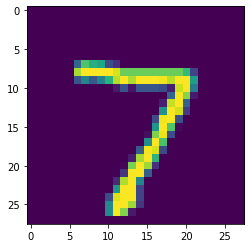

In [13]:
plt.imshow(np.reshape(x_test[0], (28,28)))

## Model Prediction Utility Function

In [0]:
# Display
def plot_img(n):
    plt.imshow(np.reshape(x_test[n], (28,28)), cmap='gray')
    plt.show()

def all_img_predict(model):
    print(model.summary())
    loss, accuracy = model.evaluate(x_test, y_test)
    print('     ')
    print('Loss:', loss)
    print('Accuracy:', accuracy)
    print('     ')
    print('(*) Confusion Metrix')
    predict = model.predict_classes(x_test)
    print(pd.crosstab( np.argmax(y_test, axis = 1), predict, rownames=['Label'], colnames=['predict']))

def one_img_predict(model, n):
    predict = model.predict_classes(x_test)
    print('Prediction:', predict[n])
    print('Answer:', y_test[n])
    plot_img(n)

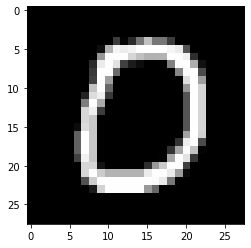

In [15]:
plot_img(10)

In [16]:
all_img_predict(CNNmodel)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

Prediction: 7
Answer: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


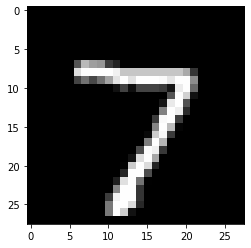

In [17]:
one_img_predict(CNNmodel, 0)